In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
"""Task 0: Initialize K-means"""


def initialize(X, k):
    """ Initializes cluster centroids for K-means
    Args:
        X: numpy.ndarray, shape(n, d), data points to be clustered
            n: number of data points
            d: dimension of data points
        k: int, number of clusters
    Returns:
        centroids: numpy.ndarray of shape (k, d) containing the initialized
            centroids for each cluster,  or None on failure"""
    if type(X) is not np.ndarray or len(X.shape) != 2:
        return None
    if type(k) is not int or k <= 0:
        return None
    mins = np.min(X, axis=0)
    maxs = np.max(X, axis=0)
    centroids = np.random.uniform(low=mins, high=maxs, size=(k, X.shape[1]))
    return centroids
    

In [6]:
"""Task 1: K-means clustering"""


def kmeans(X, k, iterations=1000):
    """Performs K-means clustering on a dataset:
    Args:
        X: numpy.ndarray, shape(n, d), data points to be clustered
            n: number of data points
            d: dimension of data points
        k: int, number of clusters
        iterations: int, max number of iterations
    Returns:
        C: numpy.ndarray, shape(k, d), centroid means for each cluster
        clss: numpy.ndarray, shape(n,), index of the cluster in C that
            each data point belongs to"""
    if type(X) is not np.ndarray or len(X.shape) != 2:
        return None, None
    if type(k) is not int or k <= 0 or iterations < 1:
        return None, None
    Cs = initialize(X, k)
    clss = np.argmin(np.linalg.norm(X[:, np.newaxis] - Cs, axis=2), axis=1)
    for i in range(iterations):
        Cs_copy = Cs.copy()
        for i in range(len(Cs)):
            if len(X[clss == i] > 0):
                Cs_copy[i] = np.mean(X[clss == i], axis=0)
            else:
                Cs_copy[i] = initialize(X, 1)
        clss = np.argmin(np.linalg.norm(X[:, np.newaxis] - Cs_copy, axis=2),
                         axis=1)
        if np.array_equal(Cs, Cs_copy):
            break
        Cs = Cs_copy
    return Cs, clss

In [7]:
"""Task 2: Variance"""


def variance(X, C):
    """Calculates the total intra-cluster variance for a data set
    Args:
        X: numpy.ndarray, shape(n, d), data points being clustered
            n: number of data points
            d: dimension of data points
        C: numpy.ndarray, shape(k, d), centroid means for each cluster
    Returns:
        var: the total variance"""

    if type(X) is not np.ndarray or len(X.shape) != 2:
        return None
    if type(C) is not np.ndarray or len(C.shape) != 2:
        return None
    try:
        distances = np.linalg.norm(X[:, np.newaxis] - C, axis=2)
        clss = np.argmin(distances, axis=1)
        return np.sum(np.square(distances[np.arange(len(X)), clss]))
    except:
        return None


In [13]:
"""Task 3: Optimize k"""


def optimum_k(X, kmin=1, kmax=None, iterations=1000):
    """Tests for the optimum number of clusters by variance
    Args:
        X: numpy.ndarray of shape (n, d) containing the data set
        kmin: positive integer containing the minimum number of clusters to
            check for (inclusive)
        kmax: positive integer containing the maximum number of clusters to
            check for (inclusive)
        iterations: positive integer containing the maximum number of
            iterations for K-means
    Returns:
        results: list containing the outputs of K-means for each cluster size
        d_vars: list containing the difference in variance from the smallest
            cluster size for each cluster size"""

    if type(X) is not np.ndarray or X.ndim != 2:
        return None, None
    if type(kmin) is not int or kmin < 1:
        return None, None
    if kmax is None:
        kmax = X.shape[0]
    if type(kmax) is not int or kmax <= 0 or kmin >= kmax:
        return None, None
    if type(iterations) is not int or iterations < 1:
        return None, None

    results, d_vars = [], []
    k = kmin
    while(k <= kmax):
        klusters, klss = kmeans(X, k, iterations)
        if k == kmin:
            var = variance(X, klusters)
            results.append((klusters, klss))
            d_vars.append(0.0)
            k +=1
            continue

        results.append((klusters, klss))
        d_vars.append(abs(var - variance(X, klusters)))
        k += 1
    
    return results, d_vars

[(array([[31.78625503, 37.01090945]]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])), (array([[34.76990289, 28.71421162],
       [20.14417812, 69.38429903]]), array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,

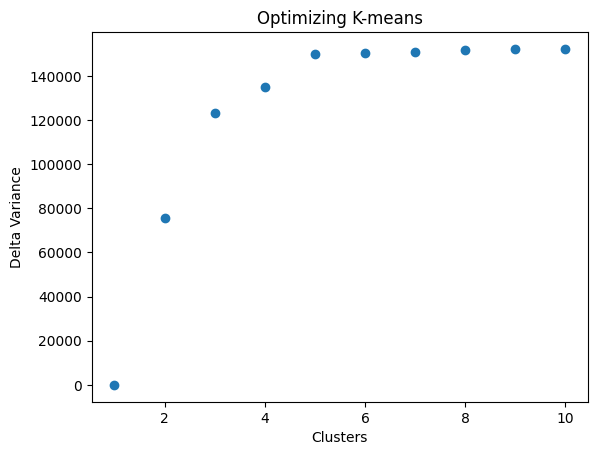

In [14]:
np.random.seed(0)
a = np.random.multivariate_normal([30, 40], [[16, 0], [0, 16]], size=50)
b = np.random.multivariate_normal([10, 25], [[16, 0], [0, 16]], size=50)
c = np.random.multivariate_normal([40, 20], [[16, 0], [0, 16]], size=50)
d = np.random.multivariate_normal([60, 30], [[16, 0], [0, 16]], size=50)
e = np.random.multivariate_normal([20, 70], [[16, 0], [0, 16]], size=50)
X = np.concatenate((a, b, c, d, e), axis=0)
np.random.shuffle(X)

results, d_vars = optimum_k(X, kmax=10)
print(results)
print(np.round(d_vars, 5))
plt.scatter(list(range(1, 11)), d_vars)
plt.xlabel('Clusters')
plt.ylabel('Delta Variance')
plt.title('Optimizing K-means')
plt.show()